In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv(r"C:\Users\85868\OneDrive\Desktop\data science\csv files\Loan_approval.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
pd.set_option("display.max.columns", None)
dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
dataset['Dependents'] = dataset['Dependents'].replace(['3+'],'3')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset = dataset.drop(columns=['Loan_ID'])

In [7]:
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [8]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
for i in categorical_columns:
    data=i
    print(dataset[data].value_counts())
    print("\n")

Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Y    422
N    192
Name: Loan_Status, dtype: int64




In [ ]:
#It is an imbalance dataset because the number of man data is greater than the number of woman data.

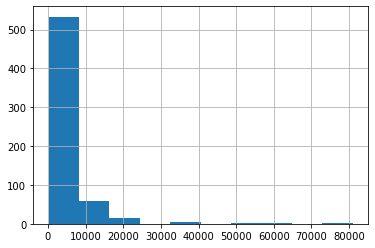

In [10]:
dataset['ApplicantIncome'].hist()

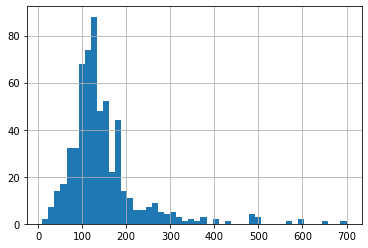

In [11]:
dataset['LoanAmount'].hist(bins=50)

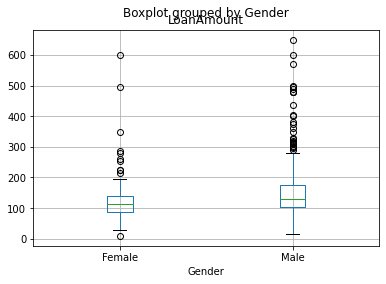

In [12]:
dataset.boxplot(column='LoanAmount', by = 'Gender')

In [13]:
pd.crosstab(dataset ['Credit_History'], dataset ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [14]:
percentage_with_credit_score1_lone_approval_Chance=(378/475)*100
print(percentage_with_credit_score1_lone_approval_Chance)

79.57894736842105


In [15]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [16]:
for category in categorical_columns:
    lbl = preprocessing.LabelEncoder()
    dataset[category]=lbl.fit_transform(dataset[category].astype('str'))
dataset.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
TotalIncome          float64
dtype: object

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
# Training XGBoost on the Training set
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

[18:42:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
# Making the Confusion Matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.04878048780487805

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 0.47374983  0.71143163 -0.76304669 ...  0.41790088 -0.05166631
   0.69203733]
 [ 0.47374983 -1.40561644  0.22549137 ...  0.41790088 -0.05166631
  -1.44500876]
 [ 0.47374983  0.71143163 -0.76304669 ... -2.39291191 -1.32007414
  -1.44500876]
 ...
 [ 0.47374983  0.71143163  2.2025675  ...  0.41790088 -0.05166631
   0.69203733]
 [ 0.47374983  0.71143163 -0.76304669 ...  0.41790088  1.21674153
  -1.44500876]
 [-2.11081869  0.71143163 -0.76304669 ...  0.41790088 -0.05166631
   0.69203733]]
[[ 0.47374983 -1.40561644 -0.76304669 ...  0.41790088 -0.05166631
   0.69203733]
 [-2.11081869 -1.40561644 -0.76304669 ...  0.41790088 -0.05166631
  -1.44500876]
 [ 0.47374983  0.71143163 -0.76304669 ...  0.41790088  1.21674153
   0.69203733]
 ...
 [ 0.47374983  0.71143163 -0.76304669 ...  0.41790088 -0.05166631
   0.69203733]
 [ 0.47374983  0.71143163  2.2025675  ... -2.39291191  1.21674153
  -1.44500876]
 [ 0.47374983  0.71143163  0.22549137 ...  0.41790088  1.21674153
   0.69203733]]


In [22]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)